In [5]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
# 코드 3-2 정수 시퀸스를 이진 행렬로 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 레이블 벡터 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0728 23:21:15.762442 140712165717824 deprecation_wrapper.py:119] From /home/xylitol/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 23:21:15.780735 140712165717824 deprecation_wrapper.py:119] From /home/xylitol/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 23:21:15.785558 140712165717824 deprecation_wrapper.py:119] From /home/xylitol/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [8]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

W0728 23:21:18.397761 140712165717824 deprecation_wrapper.py:119] From /home/xylitol/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 23:21:18.415498 140712165717824 deprecation_wrapper.py:119] From /home/xylitol/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0728 23:21:18.420188 140712165717824 deprecation.py:323] From /home/xylitol/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
from keras import losses
from keras import metrics

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1401 - acc: 0.9517 - val_loss: 0.1415 - val_acc: 0.9515
Epoch 2/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1183 - acc: 0.9605 - val_loss: 0.1574 - val_acc: 0.9419
Epoch 3/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.0965 - acc: 0.9710 - val_loss: 0.1684 - val_acc: 0.9388
Epoch 4/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.0802 - acc: 0.9767 - val_loss: 0.1858 - val_acc: 0.9322
Epoch 5/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.0680 - acc: 0.9805 - val_loss: 0.2040 - val_acc: 0.9264
Epoch 6/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.0546 - acc: 0.9861 - val_loss: 0.2410 - val_acc: 0.9156
Epoch 7/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.0454 - acc: 0.9890 - val_loss: 0.2514 - 

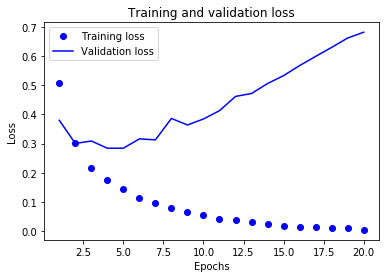

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig1.png', dpi=100)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [27]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

fig2 = plt.gcf()

plt.draw()
fig2.savefig('fig2.png', dpi=100)

NameError: name 'history_dict' is not defined

<Figure size 432x288 with 0 Axes>

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.4687 - acc: 0.8208
Epoch 2/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.2663 - acc: 0.9081
Epoch 3/4
25000/25000 [==============================] - 1s 57us/step - loss: 0.2029 - acc: 0.9280
Epoch 4/4
25000/25000 [==============================] - 2s 62us/step
[0.29163262097358705, 0.88524]
